<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/Algorithm/PG/%EC%88%9C%EC%9C%84_%EA%B2%80%EC%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순위 검색

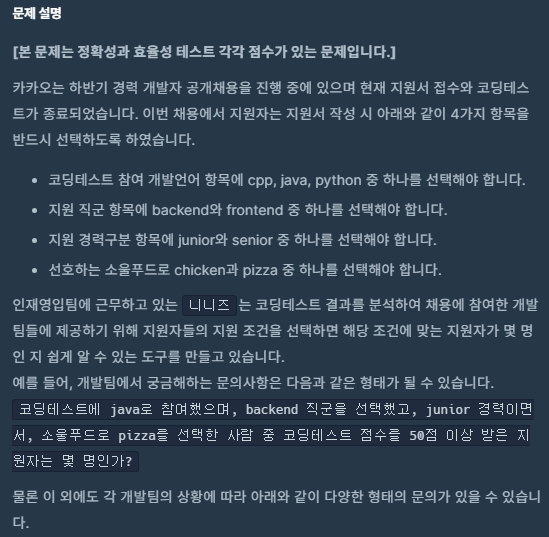

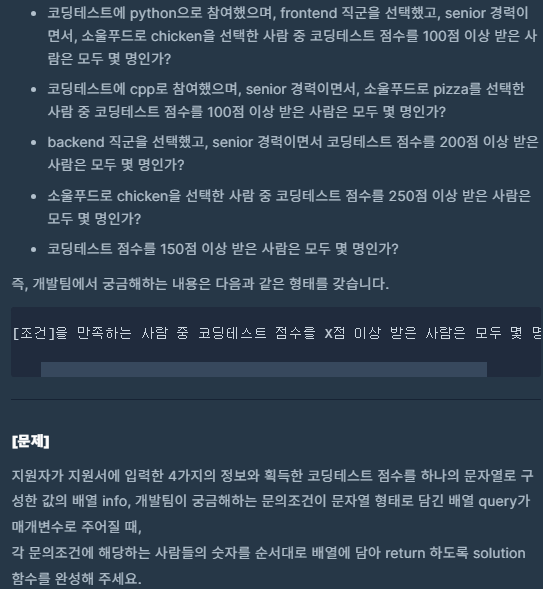

## 입력 출력 및 예제


* 입력

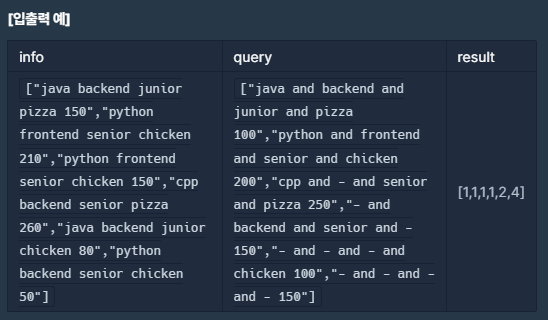

* 출력

* 예제

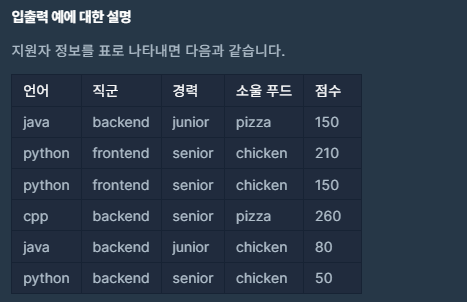

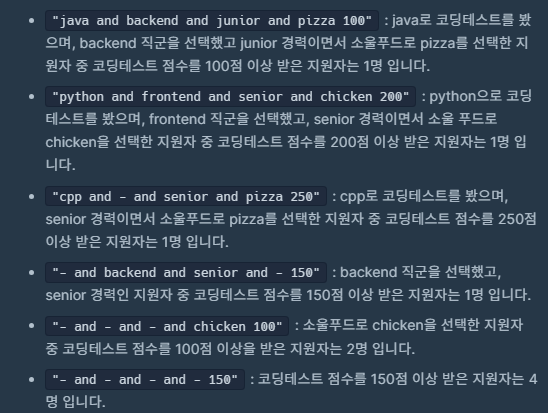

## 구상

- query를 splt 하여 해당 단어로 info의 조건이 만족되는지 일일이 count 하는건 너무 느릴 것 같다.
- 다른 방법이 안떠오르니 일단 해보자

## 코드

In [51]:
# 효율성 통과 X

def solution(info, query):
    answer = []

    applicants = []
    for i in info:
        temp = i.split(" ")
        applicants.append(temp)

    for q in query:
        temp = q.split(' and ')
        score = int(temp[-1].split(" ")[-1])
        words = temp[:-1]
        words.append(temp[-1].split(" ")[0])

        count = 0

        for person in applicants:
            flag = True
            for i in range(len(words)): # 코딩점수 제외 조건
                if words[i] == '-' or words[i] in person:
                    pass
                else:
                    flag = False
                    break

            if flag == True and int(person[-1]) >= score:
                pass
            else:
                flag = False

            if flag == True:
                count += 1

        answer.append(count)


    return answer

In [54]:
# gpt 풀이

from collections import defaultdict
from bisect import bisect_left
from itertools import combinations

def solution(info, query):
    db = defaultdict(list)

    for i in info:
        temp = i.split()
        conditions = temp[:-1]
        score = int(temp[-1])

        # 0~4개의 조건 중 일부만 '-'로 바꾼 모든 조합
        for n in range(5):
            for comb in combinations([0,1,2,3], n):
                temp_cond = conditions[:]
                for idx in comb:
                    temp_cond[idx] = '-'
                key = '/'.join(temp_cond)
                db[key].append(score)

    # 점수 리스트 오름차순 정렬 (이진 탐색 가능하게)
    for key in db:
        db[key].sort()

    answer = []
    for q in query:
        q = q.replace(" and ", " ")
        q = q.split()
        key = '/'.join(q[:-1])
        score = int(q[-1])

        if key in db:
            scores = db[key]
            idx = bisect_left(scores, score)
            answer.append(len(scores) - idx)
        else:
            answer.append(0)

    return answer


In [57]:
# 다른 사람 풀이

def solution(info, query):
    data = dict()
    for a in ['cpp', 'java', 'python', '-']:
        for b in ['backend', 'frontend', '-']:
            for c in ['junior', 'senior', '-']:
                for d in ['chicken', 'pizza', '-']:
                    data.setdefault((a, b, c, d), list())
    for i in info:
        i = i.split()
        for a in [i[0], '-']:
            for b in [i[1], '-']:
                for c in [i[2], '-']:
                    for d in [i[3], '-']:
                        data[(a, b, c, d)].append(int(i[4]))

    for k in data:
        data[k].sort()

        # print(k, data[k])

    answer = list()
    for q in query:
        q = q.split()

        pool = data[(q[0], q[2], q[4], q[6])]
        find = int(q[7])
        l = 0
        r = len(pool)
        mid = 0
        while l < r:
            mid = (r+l)//2
            if pool[mid] >= find:
                r = mid
            else:
                l = mid+1
            # print(l, r, mid, answer)
        # answer.append((pool, find, mid))
        answer.append(len(pool)-l)

    return answer

In [58]:
info = ["java backend junior pizza 150","python frontend senior chicken 210","python frontend senior chicken 150","cpp backend senior pizza 260","java backend junior chicken 80","python backend senior chicken 50"]
query = ["java and backend and junior and pizza 100","python and frontend and senior and chicken 200","cpp and - and senior and pizza 250","- and backend and senior and - 150","- and - and - and chicken 100","- and - and - and - 150"]

In [59]:
solution(info, query)

[1, 1, 1, 1, 2, 4]

In [47]:
if 'java' in ['java', 'backend', 'junior', 'pizza', '150']:
    print('1')

1


### 메모
- 인풋 데이터가 많고 쿼리의 조합이 적을 때 해당 조합을 전부 저장해두는 방식이 훨씬 효율적이다

*